In [23]:
import tensorflow as tf
from pretty_midi import PrettyMIDI, Instrument, Note, ControlChange
from music21 import instrument, note, stream, chord, converter
import matplotlib.pyplot as plt
import numpy as np

from external import processor

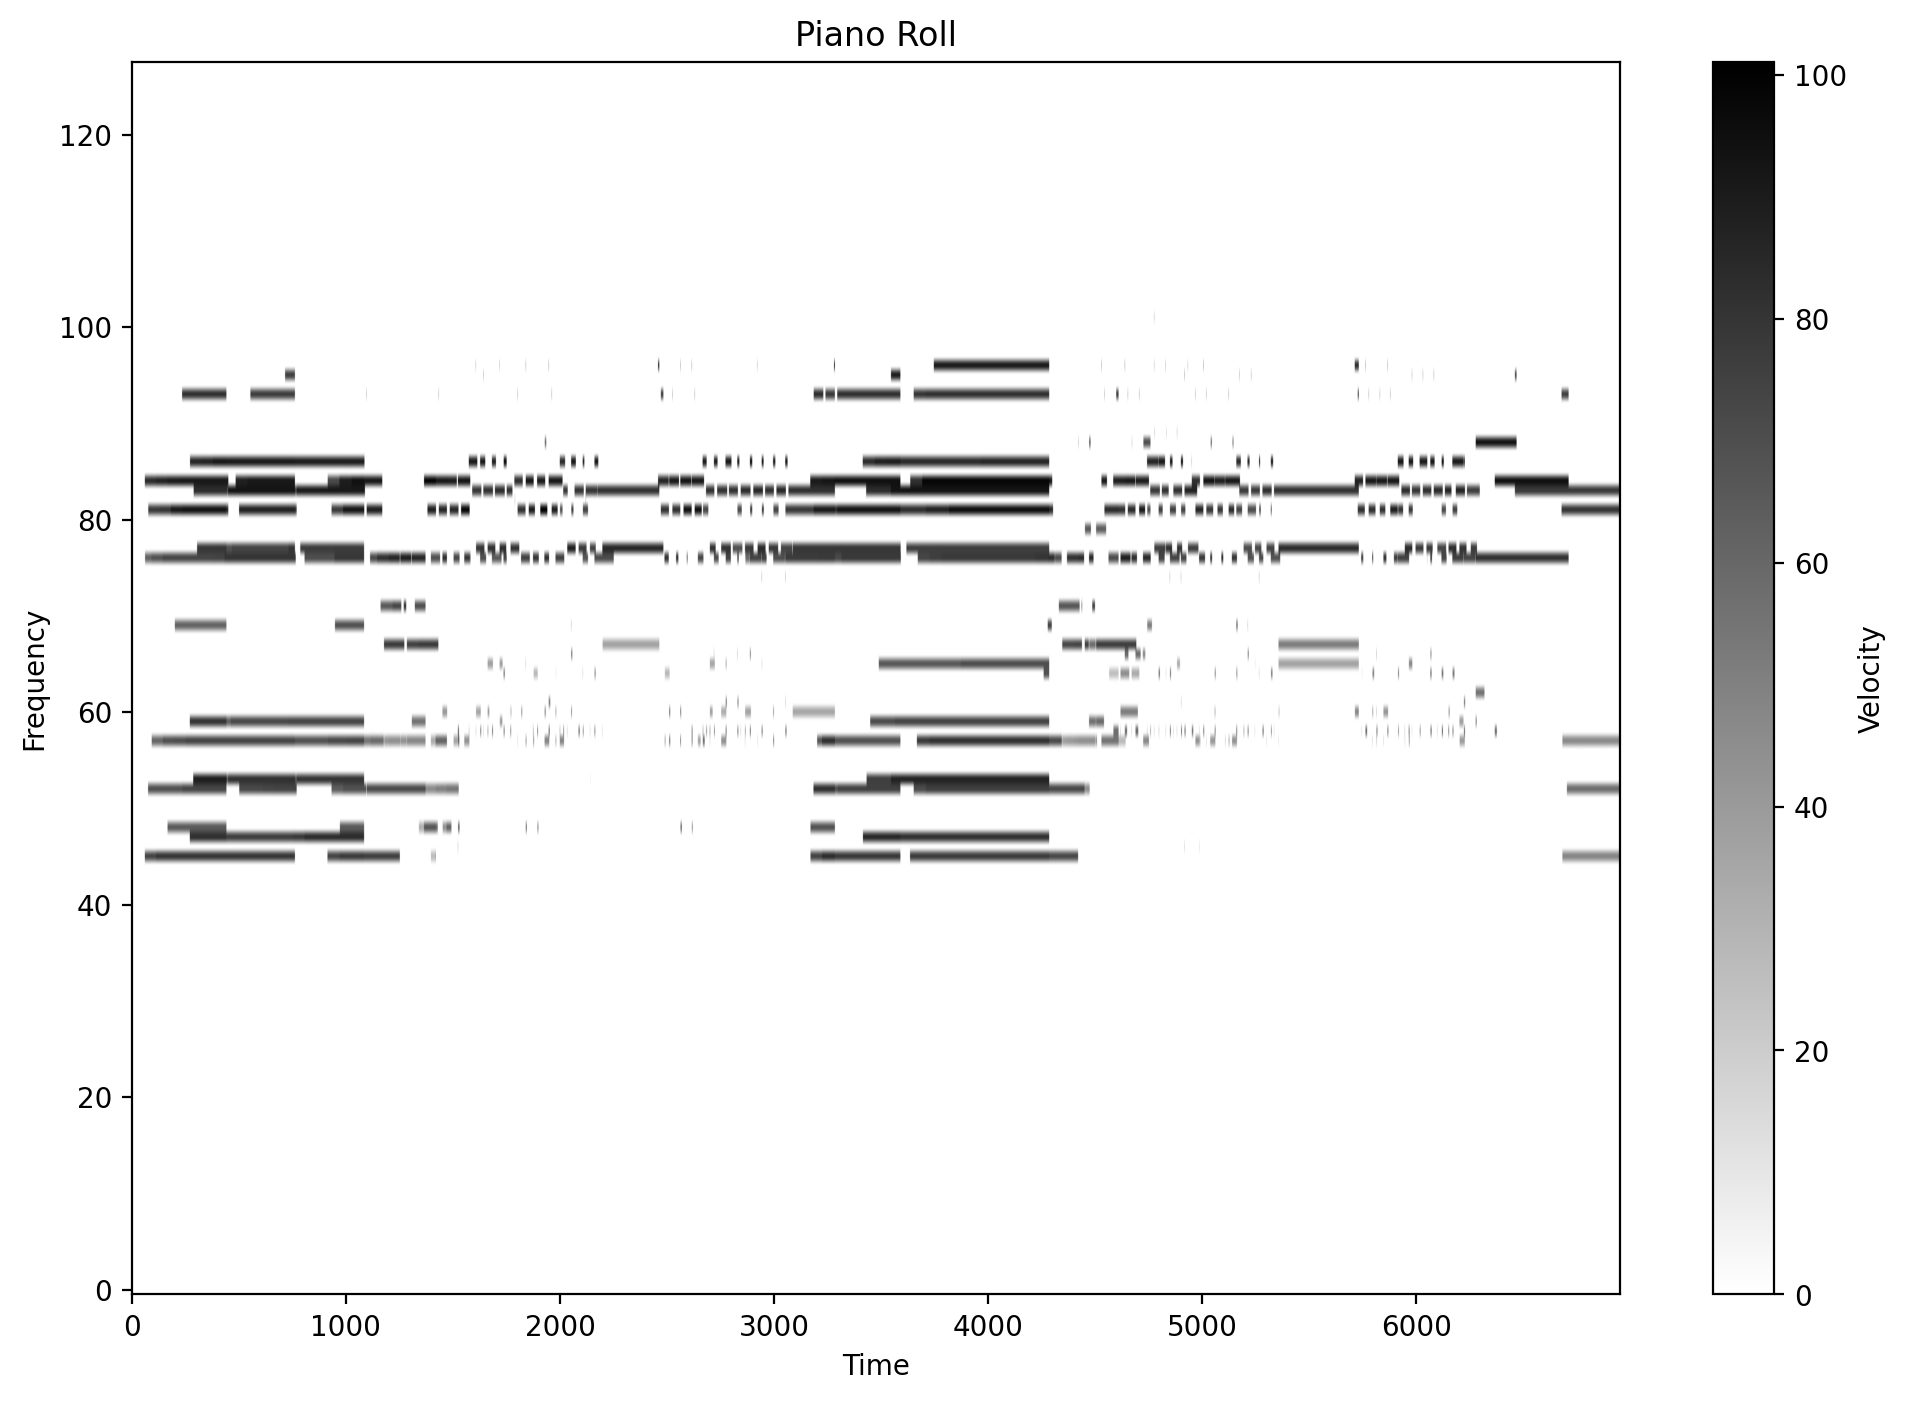

In [2]:
midi_file = "midis/A., Jag, Je t'aime Juliette, OXC7Fd0ZN8o.mid"

music = PrettyMIDI(midi_file=midi_file)
piano_roll = music.get_piano_roll()

# Plot the piano roll
plt.figure(figsize=(12, 8))
plt.imshow(piano_roll, aspect='auto', origin='lower', cmap='gray_r')
plt.title('Piano Roll')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(label='Velocity')
plt.show()

## Not needed anymore

In [19]:
def read_file(file):
    notes=[]
    notes_to_parse=None
    #parse the midi file
    midi=converter.parse(file)
    #seperate all instruments from the file
    instrmt=instrument.partitionByInstrument(midi)
    for part in instrmt.parts:
        notes_to_parse=part.recurse()
        #iterate over all the parts of sub stream elements
        #check if element's type is Note or chord
        #if it is chord split them into notes
        for element in notes_to_parse:
            if type(element)==note.Note:
                notes.append(str(element.pitch))
            elif type(element)==chord.Chord:
                notes.append('.'.join(str(n) for n in element.normalOrder))
    #return the list of notes
    return notes

notes_array = np.array(read_file(midi_file))

print(notes_array)

['9.0' 'E5' 'C3' '4.9' 'E5' 'A3' '9.0' 'E5' 'A5' 'E3' 'A3' 'E5' '9.0' 'C3'
 'E5' 'A5' '4.9' '4.9' 'A4' '9.0' '4.9' 'C6' 'A2' 'A6' 'A5' 'E3' 'A3' 'E5'
 '11.2' 'B3' 'A5' '5.11' 'A5' '5.11' 'A5' '11.2' '5.11' 'B3' '5.9'
 '11.2.4' 'A5' '5.11' 'A3' 'C6' 'A2' '11.2.4' 'B3' 'A5' '5.11' 'D6' 'E5'
 'B2' '5.11' 'B3' 'F5' '9.0' '4.9' '4.9' '9.0' 'A6' '4.9' '4.9' '9.0'
 '5.11' 'B3' 'D6' '9.0' 'B2' 'F5' '4.9' 'A6' '4.9' '4.9' '9.0' 'A6' 'A5'
 'E3' 'E5' 'A3' '9.11.2' '5.11' 'B6' 'B3' 'F5' '11.2' '4.9' '5.11' 'F5'
 'B3' 'D6' '11.4' 'A3' '5.11' 'F5' 'B3' '5.11' 'F5' '11' 'F5' 'D6' '11'
 'B5' 'A5' 'F3' 'B2' 'B3' 'F5' '9.0' 'A3' '4.9' 'E5' 'E5' '9' '9.0' 'E5'
 'A5' 'E3' '4.9' 'D6' 'F5' 'B5' 'E5' 'B3' 'A5' '9.0' 'E3' '9' '9.0' 'E3'
 '4.9' 'A3' 'E5' 'C6' 'E3' 'A2' 'A6' 'A5' 'E3' 'E5' 'A3' 'E5' 'B4' 'G4'
 'A3' '4.9' 'B4' 'G4' 'A2' 'E3' 'B4' 'G4' 'E5' 'A3' 'B4' 'G4' 'A3' 'E5'
 'C3' 'B3' 'B4' 'G4' 'C3' '0' 'E3' 'A6' 'A5' 'E5' 'A2' 'A3' 'G4' 'E3' 'A5'
 '9.0.4' '9.0' 'A6' 'A5' '9.0.4' 'E3' 'C6' '10.0' 'C3' 'A6

### For a more readable representation of chords

In [20]:
# Convert chord pitch classes to note names
def convert_chord_to_notes(chord_str):
    pitch_classes = [int(pc) for pc in chord_str.split('.')]
    notes = [note.Note(pitchClass=pc).nameWithOctave for pc in pitch_classes]
    return notes

# Print notes and chords
for n in notes_array:
    if '.' in n:
        print(f"Chord: {n} -> Notes: {convert_chord_to_notes(n)}")
    else:
        print(f"Note: {n}")

Chord: 9.0 -> Notes: ['A4', 'C4']
Note: E5
Note: C3
Chord: 4.9 -> Notes: ['E4', 'A4']
Note: E5
Note: A3
Chord: 9.0 -> Notes: ['A4', 'C4']
Note: E5
Note: A5
Note: E3
Note: A3
Note: E5
Chord: 9.0 -> Notes: ['A4', 'C4']
Note: C3
Note: E5
Note: A5
Chord: 4.9 -> Notes: ['E4', 'A4']
Chord: 4.9 -> Notes: ['E4', 'A4']
Note: A4
Chord: 9.0 -> Notes: ['A4', 'C4']
Chord: 4.9 -> Notes: ['E4', 'A4']
Note: C6
Note: A2
Note: A6
Note: A5
Note: E3
Note: A3
Note: E5
Chord: 11.2 -> Notes: ['B4', 'D4']
Note: B3
Note: A5
Chord: 5.11 -> Notes: ['F4', 'B4']
Note: A5
Chord: 5.11 -> Notes: ['F4', 'B4']
Note: A5
Chord: 11.2 -> Notes: ['B4', 'D4']
Chord: 5.11 -> Notes: ['F4', 'B4']
Note: B3
Chord: 5.9 -> Notes: ['F4', 'A4']
Chord: 11.2.4 -> Notes: ['B4', 'D4', 'E4']
Note: A5
Chord: 5.11 -> Notes: ['F4', 'B4']
Note: A3
Note: C6
Note: A2
Chord: 11.2.4 -> Notes: ['B4', 'D4', 'E4']
Note: B3
Note: A5
Chord: 5.11 -> Notes: ['F4', 'B4']
Note: D6
Note: E5
Note: B2
Chord: 5.11 -> Notes: ['F4', 'B4']
Note: B3
Note: F5
Chor

## End not needed anymore

In [46]:
encoded = processor.encode_midi(midi_file)
processor.decode_midi(encoded, "decoded.mid")

print(encoded)
total_range = processor.TOTAL_RANGE

[315, 374, 45, 377, 84, 256, 371, 48, 371, 76, 269, 373, 52, 256, 375, 81, 270, 204, 373, 76, 256, 371, 57, 275, 212, 377, 84, 173, 375, 45, 204, 372, 76, 271, 209, 375, 81, 180, 371, 52, 271, 185, 373, 57, 204, 374, 76, 276, 212, 378, 84, 173, 374, 45, 256, 176, 372, 48, 256, 204, 371, 76, 209, 374, 81, 270, 209, 378, 81, 180, 372, 52, 270, 185, 373, 57, 256, 204, 373, 76, 257, 371, 69, 273, 212, 378, 84, 173, 375, 45, 271, 376, 93, 209, 379, 81, 180, 374, 52, 270, 185, 374, 57, 204, 374, 76, 275, 376, 47, 256, 376, 59, 256, 209, 376, 81, 377, 86, 270, 378, 53, 257, 376, 83, 256, 209, 375, 81, 270, 187, 373, 59, 375, 77, 275, 214, 209, 376, 81, 377, 86, 256, 175, 374, 47, 270, 211, 376, 83, 181, 373, 53, 272, 187, 374, 59, 205, 375, 77, 209, 372, 81, 276, 214, 378, 86, 204, 175, 374, 76, 375, 47, 256, 209, 376, 81, 271, 211, 376, 83, 256, 181, 374, 53, 272, 205, 373, 77, 256, 187, 371, 59, 273, 204, 378, 86, 376, 76, 256, 375, 47, 264, 176, 197, 221, 180, 214, 175, 261, 211, 181, 256,

In [47]:
notes_array = np.array(encoded)

# Define sequence length
sequence_length = 100

# Create sequences and corresponding outputs
sequences = []
outputs = []
for i in range(len(notes_array) - sequence_length):
    sequences.append(notes_array[i:i + sequence_length])
    outputs.append(notes_array[i + sequence_length])

# Convert sequences and outputs to numpy arrays
X = np.array(sequences)
y = np.array(outputs)

# One-hot encode the output
y = tf.keras.utils.to_categorical(y, num_classes=389)  # Assuming 389 unique values (0 to 388)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], sequence_length, 1))

# Normalize input
X = X / float(388)
print(X)


[[[0.81185567]
  [0.96391753]
  [0.11597938]
  ...
  [0.96391753]
  [0.13402062]
  [0.69587629]]

 [[0.96391753]
  [0.11597938]
  [0.97164948]
  ...
  [0.13402062]
  [0.69587629]
  [0.47680412]]

 [[0.11597938]
  [0.97164948]
  [0.21649485]
  ...
  [0.69587629]
  [0.47680412]
  [0.96391753]]

 ...

 [[0.14948454]
  [0.52061856]
  [0.66494845]
  ...
  [0.44587629]
  [0.44587629]
  [0.47680412]]

 [[0.52061856]
  [0.66494845]
  [0.47680412]
  ...
  [0.44587629]
  [0.47680412]
  [0.47680412]]

 [[0.66494845]
  [0.47680412]
  [0.65979381]
  ...
  [0.47680412]
  [0.47680412]
  [0.53865979]]]


In [ ]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(256))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(256,activation='relu'))
#fully connected layer for the output
model.add(keras.layers.Dense(389,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

model.summary()

/var/home/ryan/Documents/debianhome/MIDI-Machine-Learning/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 256)       │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 389)            │        99,973 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 955,269 (3.64 MB)

 Trainable params: 955,269 (3.64 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.fit(X, y, epochs=60, batch_size=64)

Epoch 1/60
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 4.9651
Epoch 2/60
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 4.3104
Epoch 3/60
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 4.2608
Epoch 4/60
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 4.2641
Epoch 5/60
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 4.2220
Epoch 6/60
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 4.2641
Epoch 7/60
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 4.2639
Epoch 8/60
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 4.2394
Epoch 9/60
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 4.1821
Epoch 10/60
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 4.1225
Epoch 11/60
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 3.9217
Epoch 12/60
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 3.6975
Epoch 13/60
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 3.5945
Epoch 14/60
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 3.5294
Epoch 15/60
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss

In [50]:
model.save('lstm_midi_model.keras')

In [36]:

model = keras.models.load_model('lstm_midi_model.keras')

/var/home/ryan/Documents/debianhome/MIDI-Machine-Learning/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [51]:
generated_notes = []
seed = X[0]

for _ in range(200):
    prediction = model.predict(seed[np.newaxis, :, :], verbose=0)
    index = np.argmax(prediction)
    generated_notes.append(int(index))
    
    # Update the seed sequence
    seed = np.append(seed[1:], [[index / float(total_range)]], axis=0)

print(generated_notes)

[187, 375, 59, 205, 375, 77, 256, 175, 374, 47, 205, 375, 77, 271, 214, 378, 86, 209, 375, 81, 256, 175, 375, 47, 271, 204, 375, 83, 256, 181, 375, 53, 373, 69, 270, 214, 375, 81, 205, 375, 77, 256, 175, 375, 47, 205, 375, 77, 271, 187, 378, 86, 209, 375, 81, 256, 175, 375, 47, 271, 204, 375, 83, 256, 181, 375, 53, 373, 69, 270, 214, 375, 81, 205, 375, 77, 256, 175, 375, 47, 205, 375, 77, 271, 187, 378, 86, 209, 375, 81, 256, 175, 375, 47, 271, 204, 375, 83, 256, 181, 375, 53, 373, 69, 270, 214, 375, 81, 205, 375, 77, 256, 175, 375, 47, 205, 375, 77, 271, 187, 378, 86, 209, 375, 81, 256, 175, 375, 47, 271, 204, 375, 83, 256, 181, 375, 53, 373, 69, 270, 214, 375, 81, 205, 375, 77, 256, 175, 375, 47, 205, 375, 77, 271, 187, 378, 86, 209, 375, 81, 256, 175, 375, 47, 271, 204, 375, 83, 256, 181, 375, 53, 373, 69, 270, 214, 375, 81, 205, 375, 77, 256, 175, 375, 47, 205, 375, 77, 271, 187, 378, 86, 209, 375, 81, 256, 175, 375, 47, 271]


In [52]:
print(generated_notes)
processor.decode_midi(generated_notes, 'generated.mid')

[187, 375, 59, 205, 375, 77, 256, 175, 374, 47, 205, 375, 77, 271, 214, 378, 86, 209, 375, 81, 256, 175, 375, 47, 271, 204, 375, 83, 256, 181, 375, 53, 373, 69, 270, 214, 375, 81, 205, 375, 77, 256, 175, 375, 47, 205, 375, 77, 271, 187, 378, 86, 209, 375, 81, 256, 175, 375, 47, 271, 204, 375, 83, 256, 181, 375, 53, 373, 69, 270, 214, 375, 81, 205, 375, 77, 256, 175, 375, 47, 205, 375, 77, 271, 187, 378, 86, 209, 375, 81, 256, 175, 375, 47, 271, 204, 375, 83, 256, 181, 375, 53, 373, 69, 270, 214, 375, 81, 205, 375, 77, 256, 175, 375, 47, 205, 375, 77, 271, 187, 378, 86, 209, 375, 81, 256, 175, 375, 47, 271, 204, 375, 83, 256, 181, 375, 53, 373, 69, 270, 214, 375, 81, 205, 375, 77, 256, 175, 375, 47, 205, 375, 77, 271, 187, 378, 86, 209, 375, 81, 256, 175, 375, 47, 271, 204, 375, 83, 256, 181, 375, 53, 373, 69, 270, 214, 375, 81, 205, 375, 77, 256, 175, 375, 47, 205, 375, 77, 271, 187, 378, 86, 209, 375, 81, 256, 175, 375, 47, 271]
info removed pitch: 59
info removed pitch: 77
info remov